## IBM Keras - Final Assignment - Part D

In [32]:
pip install matplotlib

     |████████████████████████████████| 8.5 MB 580 kB/s eta 0:00:01
     |████████████████████████████████| 60 kB 685 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 786 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('concrete_data.csv')

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The data looks clean, with no null values. We have to predict data of concrete strength



In [10]:
X = df[df.columns[df.columns != 'Strength']]

In [11]:
y = df['Strength']

### Import Keras Models

In [12]:
from keras.models import Sequential
from keras.layers import Dense

### Part A - Build Baseline Model

In [13]:
#Create Neural Network

def regression_model():
    #create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    #compile the model
    model.compile(optimizer='adam', loss ='mean_squared_error')
    return(model)

### Split the data

Since the data is clean we can go ahead and split the data in train and test dataset.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
n_cols = X_train.shape[1]
n_cols

8

In [16]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (721, 8)
y_train: (721,)
X_test: (309, 8)
y_test: (309,)


### Part B - Normalize the Predictors

In [17]:
X_train_norm = (X_train - X_train.mean()) / X_train.std()
#X_train_norm
X_test_norm = (X_test - X_test.mean()) / X_test.std()

In [18]:
#build the model
model = regression_model()

In [30]:
#fit the model

history = model.fit(X_train_norm, y_train, validation_split=0.2, epochs=100)
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 141us/step - loss: 11.1376 - val_loss: 58.1009
Epoch 2/100
576/576 [==============================] - 0s 116us/step - loss: 11.0012 - val_loss: 58.3837
Epoch 3/100
576/576 [==============================] - 0s 93us/step - loss: 10.9925 - val_loss: 58.7048
Epoch 4/100
576/576 [==============================] - 0s 109us/step - loss: 11.1771 - val_loss: 58.8588
Epoch 5/100
576/576 [==============================] - 0s 101us/step - loss: 11.2103 - val_loss: 58.0823
Epoch 6/100
576/576 [==============================] - 0s 93us/step - loss: 11.3605 - val_loss: 59.5544
Epoch 7/100
576/576 [==============================] - 0s 95us/step - loss: 11.2186 - val_loss: 57.8673
Epoch 8/100
576/576 [==============================] - 0s 103us/step - loss: 11.2010 - val_loss: 59.0329
Epoch 9/100
576/576 [==============================] - 0s 94us/step - loss: 11.2556 - val_loss: 57.9456
Epoch 10/100


Epoch 78/100
576/576 [==============================] - 0s 109us/step - loss: 11.0588 - val_loss: 58.6816
Epoch 79/100
576/576 [==============================] - 0s 109us/step - loss: 11.2377 - val_loss: 58.6111
Epoch 80/100
576/576 [==============================] - 0s 113us/step - loss: 11.2923 - val_loss: 57.8727
Epoch 81/100
576/576 [==============================] - 0s 116us/step - loss: 11.2673 - val_loss: 59.1130
Epoch 82/100
576/576 [==============================] - 0s 117us/step - loss: 10.9564 - val_loss: 58.5018
Epoch 83/100
576/576 [==============================] - 0s 116us/step - loss: 11.2670 - val_loss: 58.2366
Epoch 84/100
576/576 [==============================] - 0s 106us/step - loss: 10.9256 - val_loss: 59.0026
Epoch 85/100
576/576 [==============================] - 0s 145us/step - loss: 11.1179 - val_loss: 59.2412
Epoch 86/100
576/576 [==============================] - 0s 103us/step - loss: 11.6051 - val_loss: 58.5420
Epoch 87/100
576/576 [========================

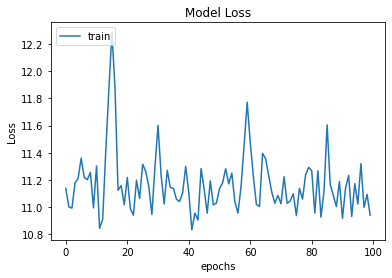

In [40]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
#Prediction on test data

predict_yhat = model.predict(X_test_norm)

In [21]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predict_yhat)
mse

96.93579077785856

In [28]:
mse_total = []

for i in range(50):
    
    print('\nIteration: ', i+1)
    model.fit(X_train_norm, y_train, validation_split=0.2, epochs=100)
    predict_yhat = model.predict(X_test_norm)
    mse = mean_squared_error(y_test, predict_yhat)
    print('\n''Mean Squared Error for iteration{}: {}'.format(i+1, mse))
    mse_total.append(mse)




Iteration:  1
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 127us/step - loss: 11.5824 - val_loss: 58.3648
Epoch 2/100
576/576 [==============================] - 0s 104us/step - loss: 11.3959 - val_loss: 59.2149
Epoch 3/100
576/576 [==============================] - 0s 95us/step - loss: 11.5984 - val_loss: 59.0843
Epoch 4/100
576/576 [==============================] - 0s 97us/step - loss: 11.5331 - val_loss: 59.2696
Epoch 5/100
576/576 [==============================] - 0s 95us/step - loss: 11.7786 - val_loss: 60.0420
Epoch 6/100
576/576 [==============================] - 0s 92us/step - loss: 11.5637 - val_loss: 57.5922
Epoch 7/100
576/576 [==============================] - 0s 95us/step - loss: 11.6175 - val_loss: 59.3583
Epoch 8/100
576/576 [==============================] - 0s 95us/step - loss: 11.5419 - val_loss: 59.6041
Epoch 9/100
576/576 [==============================] - 0s 102us/step - loss: 11.3741 - val_loss: 58.8376


576/576 [==============================] - 0s 100us/step - loss: 11.4643 - val_loss: 58.9429
Epoch 79/100
576/576 [==============================] - 0s 126us/step - loss: 11.3266 - val_loss: 59.2687
Epoch 80/100
576/576 [==============================] - 0s 125us/step - loss: 12.3177 - val_loss: 59.1571
Epoch 81/100
576/576 [==============================] - 0s 105us/step - loss: 11.4858 - val_loss: 58.6967
Epoch 82/100
576/576 [==============================] - 0s 91us/step - loss: 11.2920 - val_loss: 59.0381
Epoch 83/100
576/576 [==============================] - 0s 86us/step - loss: 11.4085 - val_loss: 58.6231
Epoch 84/100
576/576 [==============================] - 0s 86us/step - loss: 11.4143 - val_loss: 59.0420
Epoch 85/100
576/576 [==============================] - 0s 85us/step - loss: 11.8076 - val_loss: 59.4749
Epoch 86/100
576/576 [==============================] - 0s 88us/step - loss: 11.8329 - val_loss: 58.4897
Epoch 87/100
576/576 [==============================] - 0s 86us/

576/576 [==============================] - 0s 204us/step - loss: 11.4788 - val_loss: 59.1092
Epoch 55/100
576/576 [==============================] - 0s 292us/step - loss: 11.4749 - val_loss: 58.7131
Epoch 56/100
576/576 [==============================] - 0s 107us/step - loss: 11.4951 - val_loss: 59.5102
Epoch 57/100
576/576 [==============================] - 0s 106us/step - loss: 11.4660 - val_loss: 59.2235
Epoch 58/100
576/576 [==============================] - 0s 113us/step - loss: 11.4267 - val_loss: 59.6208
Epoch 59/100
576/576 [==============================] - 0s 112us/step - loss: 11.2645 - val_loss: 58.8521
Epoch 60/100
576/576 [==============================] - 0s 121us/step - loss: 11.5231 - val_loss: 58.9409
Epoch 61/100
576/576 [==============================] - 0s 131us/step - loss: 11.5327 - val_loss: 58.9354
Epoch 62/100
576/576 [==============================] - 0s 133us/step - loss: 11.4182 - val_loss: 58.6885
Epoch 63/100
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 316us/step - loss: 11.5114 - val_loss: 59.5103
Epoch 31/100
576/576 [==============================] - 0s 280us/step - loss: 12.0017 - val_loss: 58.6598
Epoch 32/100
576/576 [==============================] - 0s 244us/step - loss: 11.5805 - val_loss: 58.9120
Epoch 33/100
576/576 [==============================] - 0s 152us/step - loss: 11.6778 - val_loss: 59.3682
Epoch 34/100
576/576 [==============================] - 0s 170us/step - loss: 11.3491 - val_loss: 59.0830
Epoch 35/100
576/576 [==============================] - 0s 132us/step - loss: 11.4397 - val_loss: 58.5862
Epoch 36/100
576/576 [==============================] - 0s 137us/step - loss: 11.5731 - val_loss: 58.6982
Epoch 37/100
576/576 [==============================] - 0s 145us/step - loss: 11.7833 - val_loss: 59.6755
Epoch 38/100
576/576 [==============================] - 0s 170us/step - loss: 11.7622 - val_loss: 59.6042
Epoch 39/100
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 95us/step - loss: 11.2739 - val_loss: 58.9063
Epoch 7/100
576/576 [==============================] - 0s 96us/step - loss: 11.4565 - val_loss: 58.7023
Epoch 8/100
576/576 [==============================] - 0s 107us/step - loss: 11.4511 - val_loss: 58.5658
Epoch 9/100
576/576 [==============================] - 0s 97us/step - loss: 11.3623 - val_loss: 58.4864
Epoch 10/100
576/576 [==============================] - 0s 94us/step - loss: 11.3331 - val_loss: 59.0049
Epoch 11/100
576/576 [==============================] - 0s 86us/step - loss: 11.2994 - val_loss: 58.2382
Epoch 12/100
576/576 [==============================] - 0s 82us/step - loss: 11.4296 - val_loss: 59.4284
Epoch 13/100
576/576 [==============================] - 0s 82us/step - loss: 11.3255 - val_loss: 58.8109
Epoch 14/100
576/576 [==============================] - 0s 83us/step - loss: 11.6723 - val_loss: 59.0339
Epoch 15/100
576/576 [==============================] - 0s 82us/step -

576/576 [==============================] - 0s 82us/step - loss: 11.4339 - val_loss: 58.6812
Epoch 85/100
576/576 [==============================] - 0s 84us/step - loss: 11.3793 - val_loss: 59.3422
Epoch 86/100
576/576 [==============================] - 0s 82us/step - loss: 11.3977 - val_loss: 58.6015
Epoch 87/100
576/576 [==============================] - 0s 88us/step - loss: 11.4133 - val_loss: 58.8810
Epoch 88/100
576/576 [==============================] - 0s 94us/step - loss: 11.2518 - val_loss: 59.3207
Epoch 89/100
576/576 [==============================] - ETA: 0s - loss: 11.76 - 0s 83us/step - loss: 11.4011 - val_loss: 58.6899
Epoch 90/100
576/576 [==============================] - 0s 86us/step - loss: 11.4464 - val_loss: 58.7956
Epoch 91/100
576/576 [==============================] - 0s 85us/step - loss: 11.2469 - val_loss: 59.2251
Epoch 92/100
576/576 [==============================] - 0s 85us/step - loss: 11.3322 - val_loss: 58.6565
Epoch 93/100
576/576 [======================

Epoch 61/100
576/576 [==============================] - 0s 95us/step - loss: 11.3135 - val_loss: 58.8733
Epoch 62/100
576/576 [==============================] - 0s 103us/step - loss: 11.4215 - val_loss: 59.1050
Epoch 63/100
576/576 [==============================] - 0s 96us/step - loss: 11.2505 - val_loss: 59.6123
Epoch 64/100
576/576 [==============================] - 0s 82us/step - loss: 11.6574 - val_loss: 59.0298
Epoch 65/100
576/576 [==============================] - 0s 100us/step - loss: 11.4291 - val_loss: 59.2467
Epoch 66/100
576/576 [==============================] - 0s 81us/step - loss: 11.5303 - val_loss: 59.4780
Epoch 67/100
576/576 [==============================] - 0s 80us/step - loss: 11.2320 - val_loss: 58.4975
Epoch 68/100
576/576 [==============================] - 0s 89us/step - loss: 11.3200 - val_loss: 58.6574
Epoch 69/100
576/576 [==============================] - 0s 81us/step - loss: 11.4294 - val_loss: 58.3359
Epoch 70/100
576/576 [==============================]

Epoch 38/100
576/576 [==============================] - 0s 100us/step - loss: 11.5987 - val_loss: 59.4640
Epoch 39/100
576/576 [==============================] - 0s 103us/step - loss: 11.5032 - val_loss: 58.5753
Epoch 40/100
576/576 [==============================] - 0s 108us/step - loss: 11.7107 - val_loss: 59.6017
Epoch 41/100
576/576 [==============================] - 0s 117us/step - loss: 11.3524 - val_loss: 59.1161
Epoch 42/100
576/576 [==============================] - 0s 105us/step - loss: 11.5692 - val_loss: 58.5693
Epoch 43/100
576/576 [==============================] - 0s 96us/step - loss: 11.3601 - val_loss: 59.3216
Epoch 44/100
576/576 [==============================] - 0s 142us/step - loss: 11.5396 - val_loss: 59.0178
Epoch 45/100
576/576 [==============================] - 0s 102us/step - loss: 11.4465 - val_loss: 58.2981
Epoch 46/100
576/576 [==============================] - 0s 102us/step - loss: 11.5380 - val_loss: 59.6259
Epoch 47/100
576/576 [=========================

Epoch 15/100
576/576 [==============================] - 0s 83us/step - loss: 11.4480 - val_loss: 59.6119
Epoch 16/100
576/576 [==============================] - 0s 80us/step - loss: 11.4229 - val_loss: 59.2958
Epoch 17/100
576/576 [==============================] - 0s 80us/step - loss: 11.3294 - val_loss: 59.1925
Epoch 18/100
576/576 [==============================] - 0s 79us/step - loss: 11.9429 - val_loss: 59.1168
Epoch 19/100
576/576 [==============================] - 0s 84us/step - loss: 11.3677 - val_loss: 59.2640
Epoch 20/100
576/576 [==============================] - 0s 80us/step - loss: 11.3160 - val_loss: 58.8307
Epoch 21/100
576/576 [==============================] - 0s 80us/step - loss: 11.4151 - val_loss: 58.5593
Epoch 22/100
576/576 [==============================] - 0s 81us/step - loss: 11.3547 - val_loss: 59.2066
Epoch 23/100
576/576 [==============================] - 0s 81us/step - loss: 11.3222 - val_loss: 58.8932
Epoch 24/100
576/576 [==============================] -

576/576 [==============================] - 0s 85us/step - loss: 11.6224 - val_loss: 58.8968
Epoch 94/100
576/576 [==============================] - 0s 91us/step - loss: 11.3668 - val_loss: 59.2295
Epoch 95/100
576/576 [==============================] - 0s 100us/step - loss: 11.3433 - val_loss: 59.2606
Epoch 96/100
576/576 [==============================] - 0s 82us/step - loss: 11.8316 - val_loss: 60.4066
Epoch 97/100
576/576 [==============================] - 0s 80us/step - loss: 11.8241 - val_loss: 58.8849
Epoch 98/100
576/576 [==============================] - 0s 80us/step - loss: 11.2631 - val_loss: 59.8907
Epoch 99/100
576/576 [==============================] - 0s 94us/step - loss: 11.4856 - val_loss: 58.9402
Epoch 100/100
576/576 [==============================] - 0s 83us/step - loss: 11.4033 - val_loss: 58.9758

Mean Squared Error for iteration7: 47.50060516898658

Iteration:  8
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0

576/576 [==============================] - 0s 82us/step - loss: 11.5979 - val_loss: 58.9152
Epoch 71/100
576/576 [==============================] - 0s 81us/step - loss: 11.2846 - val_loss: 59.4493
Epoch 72/100
576/576 [==============================] - 0s 80us/step - loss: 11.5272 - val_loss: 58.3642
Epoch 73/100
576/576 [==============================] - 0s 80us/step - loss: 11.3747 - val_loss: 59.0636
Epoch 74/100
576/576 [==============================] - 0s 80us/step - loss: 11.5747 - val_loss: 59.2872
Epoch 75/100
576/576 [==============================] - 0s 87us/step - loss: 11.4084 - val_loss: 59.0937
Epoch 76/100
576/576 [==============================] - 0s 103us/step - loss: 11.4656 - val_loss: 59.0196
Epoch 77/100
576/576 [==============================] - 0s 81us/step - loss: 11.7534 - val_loss: 59.0597
Epoch 78/100
576/576 [==============================] - 0s 81us/step - loss: 11.2982 - val_loss: 58.7952
Epoch 79/100
576/576 [==============================] - 0s 80us/ste

576/576 [==============================] - 0s 83us/step - loss: 11.2861 - val_loss: 58.4820
Epoch 48/100
576/576 [==============================] - 0s 81us/step - loss: 11.3123 - val_loss: 59.2755
Epoch 49/100
576/576 [==============================] - 0s 82us/step - loss: 11.2369 - val_loss: 59.1215
Epoch 50/100
576/576 [==============================] - 0s 81us/step - loss: 11.7049 - val_loss: 58.7366
Epoch 51/100
576/576 [==============================] - 0s 78us/step - loss: 11.5323 - val_loss: 59.6561
Epoch 52/100
576/576 [==============================] - 0s 82us/step - loss: 11.8279 - val_loss: 59.6148
Epoch 53/100
576/576 [==============================] - 0s 86us/step - loss: 11.5485 - val_loss: 58.8924
Epoch 54/100
576/576 [==============================] - 0s 133us/step - loss: 11.1784 - val_loss: 59.1031
Epoch 55/100
576/576 [==============================] - 0s 118us/step - loss: 11.5617 - val_loss: 58.4962
Epoch 56/100
576/576 [==============================] - 0s 95us/st

Epoch 24/100
576/576 [==============================] - 0s 83us/step - loss: 11.4508 - val_loss: 59.1236
Epoch 25/100
576/576 [==============================] - 0s 83us/step - loss: 11.2868 - val_loss: 58.2075
Epoch 26/100
576/576 [==============================] - 0s 100us/step - loss: 11.4165 - val_loss: 60.3785
Epoch 27/100
576/576 [==============================] - 0s 102us/step - loss: 11.5757 - val_loss: 58.8938
Epoch 28/100
576/576 [==============================] - 0s 101us/step - loss: 11.2994 - val_loss: 59.3797
Epoch 29/100
576/576 [==============================] - 0s 99us/step - loss: 11.4727 - val_loss: 58.5646
Epoch 30/100
576/576 [==============================] - 0s 99us/step - loss: 11.3662 - val_loss: 58.2030
Epoch 31/100
576/576 [==============================] - 0s 94us/step - loss: 11.5628 - val_loss: 59.1553
Epoch 32/100
576/576 [==============================] - 0s 93us/step - loss: 11.2369 - val_loss: 58.6207
Epoch 33/100
576/576 [==============================

576/576 [==============================] - 0s 94us/step - loss: 11.9544 - val_loss: 59.1704
Epoch 2/100
576/576 [==============================] - 0s 93us/step - loss: 11.2668 - val_loss: 59.4057
Epoch 3/100
576/576 [==============================] - 0s 87us/step - loss: 11.2635 - val_loss: 59.6173
Epoch 4/100
576/576 [==============================] - 0s 82us/step - loss: 11.5215 - val_loss: 59.0127
Epoch 5/100
576/576 [==============================] - 0s 93us/step - loss: 11.5477 - val_loss: 58.8760
Epoch 6/100
576/576 [==============================] - 0s 93us/step - loss: 11.3957 - val_loss: 58.7458
Epoch 7/100
576/576 [==============================] - 0s 89us/step - loss: 11.2573 - val_loss: 58.2656
Epoch 8/100
576/576 [==============================] - 0s 84us/step - loss: 11.2652 - val_loss: 59.0949
Epoch 9/100
576/576 [==============================] - 0s 83us/step - loss: 11.1836 - val_loss: 58.5568
Epoch 10/100
576/576 [==============================] - 0s 91us/step - loss:

576/576 [==============================] - 0s 90us/step - loss: 11.2933 - val_loss: 58.8815
Epoch 80/100
576/576 [==============================] - 0s 98us/step - loss: 11.5718 - val_loss: 58.7385
Epoch 81/100
576/576 [==============================] - 0s 96us/step - loss: 11.4771 - val_loss: 59.0554
Epoch 82/100
576/576 [==============================] - 0s 99us/step - loss: 11.2744 - val_loss: 58.3881
Epoch 83/100
576/576 [==============================] - 0s 92us/step - loss: 11.2586 - val_loss: 59.1300
Epoch 84/100
576/576 [==============================] - 0s 85us/step - loss: 11.5952 - val_loss: 59.0812
Epoch 85/100
576/576 [==============================] - 0s 86us/step - loss: 11.2997 - val_loss: 58.6743
Epoch 86/100
576/576 [==============================] - 0s 85us/step - loss: 11.3456 - val_loss: 58.9684
Epoch 87/100
576/576 [==============================] - 0s 80us/step - loss: 11.2529 - val_loss: 58.9732
Epoch 88/100
576/576 [==============================] - 0s 82us/step

576/576 [==============================] - 0s 84us/step - loss: 11.6872 - val_loss: 59.4790
Epoch 57/100
576/576 [==============================] - 0s 85us/step - loss: 11.5664 - val_loss: 59.3835
Epoch 58/100
576/576 [==============================] - 0s 90us/step - loss: 11.3491 - val_loss: 58.4536
Epoch 59/100
576/576 [==============================] - 0s 85us/step - loss: 11.2990 - val_loss: 58.6094
Epoch 60/100
576/576 [==============================] - 0s 82us/step - loss: 11.2090 - val_loss: 59.7874
Epoch 61/100
576/576 [==============================] - 0s 84us/step - loss: 11.2184 - val_loss: 58.9006
Epoch 62/100
576/576 [==============================] - 0s 83us/step - loss: 11.3096 - val_loss: 58.6572
Epoch 63/100
576/576 [==============================] - 0s 80us/step - loss: 11.2420 - val_loss: 58.7681
Epoch 64/100
576/576 [==============================] - 0s 80us/step - loss: 11.4306 - val_loss: 59.3335
Epoch 65/100
576/576 [==============================] - 0s 85us/step

576/576 [==============================] - 0s 98us/step - loss: 11.3459 - val_loss: 59.3142
Epoch 34/100
576/576 [==============================] - 0s 79us/step - loss: 11.3396 - val_loss: 59.2361
Epoch 35/100
576/576 [==============================] - 0s 82us/step - loss: 11.3386 - val_loss: 58.3826
Epoch 36/100
576/576 [==============================] - 0s 81us/step - loss: 11.2625 - val_loss: 58.7476
Epoch 37/100
576/576 [==============================] - 0s 82us/step - loss: 11.4258 - val_loss: 59.0668
Epoch 38/100
576/576 [==============================] - 0s 81us/step - loss: 11.3970 - val_loss: 59.0584
Epoch 39/100
576/576 [==============================] - 0s 84us/step - loss: 11.3114 - val_loss: 58.9622
Epoch 40/100
576/576 [==============================] - 0s 89us/step - loss: 11.2166 - val_loss: 58.4130
Epoch 41/100
576/576 [==============================] - 0s 87us/step - loss: 11.1945 - val_loss: 59.3028
Epoch 42/100
576/576 [==============================] - 0s 84us/step

Epoch 10/100
576/576 [==============================] - 0s 81us/step - loss: 11.2236 - val_loss: 59.4223
Epoch 11/100
576/576 [==============================] - 0s 83us/step - loss: 11.2540 - val_loss: 58.8893
Epoch 12/100
576/576 [==============================] - 0s 79us/step - loss: 11.5275 - val_loss: 59.5711
Epoch 13/100
576/576 [==============================] - 0s 83us/step - loss: 11.2859 - val_loss: 58.4464
Epoch 14/100
576/576 [==============================] - 0s 82us/step - loss: 11.4667 - val_loss: 58.8872
Epoch 15/100
576/576 [==============================] - 0s 81us/step - loss: 11.3748 - val_loss: 60.1858
Epoch 16/100
576/576 [==============================] - 0s 88us/step - loss: 11.4626 - val_loss: 57.9928
Epoch 17/100
576/576 [==============================] - 0s 96us/step - loss: 11.2499 - val_loss: 59.4320
Epoch 18/100
576/576 [==============================] - 0s 93us/step - loss: 11.6384 - val_loss: 59.2863
Epoch 19/100
576/576 [==============================] -

Epoch 88/100
576/576 [==============================] - 0s 98us/step - loss: 11.2219 - val_loss: 58.9440
Epoch 89/100
576/576 [==============================] - 0s 95us/step - loss: 11.2213 - val_loss: 58.5224
Epoch 90/100
576/576 [==============================] - 0s 94us/step - loss: 11.3225 - val_loss: 59.0570
Epoch 91/100
576/576 [==============================] - 0s 124us/step - loss: 11.4528 - val_loss: 59.7036
Epoch 92/100
576/576 [==============================] - 0s 495us/step - loss: 11.4355 - val_loss: 58.8376
Epoch 93/100
576/576 [==============================] - 0s 82us/step - loss: 11.2218 - val_loss: 59.3201
Epoch 94/100
576/576 [==============================] - 0s 86us/step - loss: 11.3185 - val_loss: 59.1794
Epoch 95/100
576/576 [==============================] - 0s 88us/step - loss: 11.3074 - val_loss: 58.8369
Epoch 96/100
576/576 [==============================] - 0s 84us/step - loss: 11.2867 - val_loss: 59.0739
Epoch 97/100
576/576 [==============================]

576/576 [==============================] - 0s 85us/step - loss: 11.4303 - val_loss: 58.9691
Epoch 65/100
576/576 [==============================] - 0s 85us/step - loss: 11.2798 - val_loss: 58.8071
Epoch 66/100
576/576 [==============================] - 0s 81us/step - loss: 11.4877 - val_loss: 59.2471
Epoch 67/100
576/576 [==============================] - 0s 85us/step - loss: 11.6484 - val_loss: 58.2083
Epoch 68/100
576/576 [==============================] - 0s 137us/step - loss: 11.4067 - val_loss: 59.1093
Epoch 69/100
576/576 [==============================] - 0s 127us/step - loss: 11.2952 - val_loss: 58.7423
Epoch 70/100
576/576 [==============================] - 0s 92us/step - loss: 11.5316 - val_loss: 58.7245
Epoch 71/100
576/576 [==============================] - 0s 98us/step - loss: 11.4075 - val_loss: 58.4628
Epoch 72/100
576/576 [==============================] - 0s 89us/step - loss: 11.2465 - val_loss: 58.8249
Epoch 73/100
576/576 [==============================] - 0s 82us/st

Epoch 41/100
576/576 [==============================] - 0s 86us/step - loss: 11.3884 - val_loss: 58.9323
Epoch 42/100
576/576 [==============================] - 0s 83us/step - loss: 11.5319 - val_loss: 58.9855
Epoch 43/100
576/576 [==============================] - 0s 85us/step - loss: 11.4455 - val_loss: 58.9139
Epoch 44/100
576/576 [==============================] - 0s 92us/step - loss: 11.5955 - val_loss: 58.9515
Epoch 45/100
576/576 [==============================] - 0s 90us/step - loss: 11.4559 - val_loss: 58.6979
Epoch 46/100
576/576 [==============================] - 0s 96us/step - loss: 11.2901 - val_loss: 58.8994
Epoch 47/100
576/576 [==============================] - 0s 83us/step - loss: 11.2513 - val_loss: 58.7836
Epoch 48/100
576/576 [==============================] - 0s 84us/step - loss: 11.2681 - val_loss: 59.0149
Epoch 49/100
576/576 [==============================] - 0s 83us/step - loss: 11.3892 - val_loss: 59.0186
Epoch 50/100
576/576 [==============================] -

Epoch 18/100
576/576 [==============================] - 0s 88us/step - loss: 11.2870 - val_loss: 58.9414
Epoch 19/100
576/576 [==============================] - 0s 86us/step - loss: 11.3301 - val_loss: 59.3738
Epoch 20/100
576/576 [==============================] - 0s 84us/step - loss: 11.3660 - val_loss: 58.7492
Epoch 21/100
576/576 [==============================] - 0s 127us/step - loss: 11.3886 - val_loss: 58.4997
Epoch 22/100
576/576 [==============================] - 0s 623us/step - loss: 11.2514 - val_loss: 58.8035
Epoch 23/100
576/576 [==============================] - 0s 123us/step - loss: 11.3317 - val_loss: 59.0279
Epoch 24/100
576/576 [==============================] - 0s 129us/step - loss: 11.7249 - val_loss: 59.6890
Epoch 25/100
576/576 [==============================] - 0s 122us/step - loss: 11.6430 - val_loss: 58.0179
Epoch 26/100
576/576 [==============================] - 0s 123us/step - loss: 11.2765 - val_loss: 59.0022
Epoch 27/100
576/576 [===========================

576/576 [==============================] - 0s 94us/step - loss: 11.4377 - val_loss: 58.9513
Epoch 96/100
576/576 [==============================] - 0s 104us/step - loss: 11.2871 - val_loss: 58.8975
Epoch 97/100
576/576 [==============================] - 0s 95us/step - loss: 11.2559 - val_loss: 59.5309
Epoch 98/100
576/576 [==============================] - 0s 100us/step - loss: 11.3766 - val_loss: 59.2315
Epoch 99/100
576/576 [==============================] - 0s 89us/step - loss: 11.3712 - val_loss: 59.0009
Epoch 100/100
576/576 [==============================] - 0s 87us/step - loss: 11.2920 - val_loss: 59.0618

Mean Squared Error for iteration17: 48.17964872352723

Iteration:  18
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 86us/step - loss: 11.3626 - val_loss: 59.1408
Epoch 2/100
576/576 [==============================] - 0s 101us/step - loss: 11.3239 - val_loss: 59.4831
Epoch 3/100
576/576 [==============================] -

Epoch 72/100
576/576 [==============================] - 0s 86us/step - loss: 11.2975 - val_loss: 59.1573
Epoch 73/100
576/576 [==============================] - 0s 85us/step - loss: 11.4418 - val_loss: 58.7403
Epoch 74/100
576/576 [==============================] - 0s 95us/step - loss: 11.3896 - val_loss: 58.3886
Epoch 75/100
576/576 [==============================] - 0s 100us/step - loss: 11.3224 - val_loss: 59.0536
Epoch 76/100
576/576 [==============================] - 0s 87us/step - loss: 11.4589 - val_loss: 58.9764
Epoch 77/100
576/576 [==============================] - 0s 94us/step - loss: 11.0870 - val_loss: 59.2753
Epoch 78/100
576/576 [==============================] - 0s 91us/step - loss: 11.3670 - val_loss: 58.1218
Epoch 79/100
576/576 [==============================] - 0s 90us/step - loss: 11.1709 - val_loss: 59.9433
Epoch 80/100
576/576 [==============================] - 0s 88us/step - loss: 11.5837 - val_loss: 58.8256
Epoch 81/100
576/576 [==============================] 

Epoch 49/100
576/576 [==============================] - 0s 91us/step - loss: 11.0965 - val_loss: 59.1697
Epoch 50/100
576/576 [==============================] - 0s 85us/step - loss: 11.3016 - val_loss: 58.3556
Epoch 51/100
576/576 [==============================] - 0s 91us/step - loss: 11.3145 - val_loss: 58.7836
Epoch 52/100
576/576 [==============================] - 0s 89us/step - loss: 11.5646 - val_loss: 59.0989
Epoch 53/100
576/576 [==============================] - 0s 89us/step - loss: 11.9568 - val_loss: 58.6742
Epoch 54/100
576/576 [==============================] - 0s 85us/step - loss: 11.5494 - val_loss: 58.2621
Epoch 55/100
576/576 [==============================] - 0s 86us/step - loss: 11.1866 - val_loss: 58.3194
Epoch 56/100
576/576 [==============================] - 0s 87us/step - loss: 11.2923 - val_loss: 59.3777
Epoch 57/100
576/576 [==============================] - 0s 92us/step - loss: 11.3938 - val_loss: 58.8076
Epoch 58/100
576/576 [==============================] -

576/576 [==============================] - 0s 86us/step - loss: 11.3308 - val_loss: 59.0515
Epoch 26/100
576/576 [==============================] - 0s 85us/step - loss: 11.4963 - val_loss: 57.9198
Epoch 27/100
576/576 [==============================] - 0s 102us/step - loss: 11.1905 - val_loss: 60.2073
Epoch 28/100
576/576 [==============================] - 0s 103us/step - loss: 11.5324 - val_loss: 58.4378
Epoch 29/100
576/576 [==============================] - 0s 83us/step - loss: 11.4858 - val_loss: 59.1534
Epoch 30/100
576/576 [==============================] - 0s 86us/step - loss: 11.2233 - val_loss: 58.6338
Epoch 31/100
576/576 [==============================] - 0s 83us/step - loss: 11.3779 - val_loss: 58.7127
Epoch 32/100
576/576 [==============================] - 0s 83us/step - loss: 11.7812 - val_loss: 59.6075
Epoch 33/100
576/576 [==============================] - 0s 98us/step - loss: 11.3739 - val_loss: 58.6982
Epoch 34/100
576/576 [==============================] - 0s 84us/st

Epoch 2/100
576/576 [==============================] - 0s 92us/step - loss: 11.5420 - val_loss: 58.7135
Epoch 3/100
576/576 [==============================] - 0s 98us/step - loss: 11.2720 - val_loss: 58.5697
Epoch 4/100
576/576 [==============================] - 0s 110us/step - loss: 11.2849 - val_loss: 58.3703
Epoch 5/100
576/576 [==============================] - 0s 92us/step - loss: 11.4124 - val_loss: 59.1780
Epoch 6/100
576/576 [==============================] - 0s 84us/step - loss: 11.3037 - val_loss: 58.6304
Epoch 7/100
576/576 [==============================] - 0s 82us/step - loss: 11.3076 - val_loss: 59.0107
Epoch 8/100
576/576 [==============================] - 0s 83us/step - loss: 11.2892 - val_loss: 59.2184
Epoch 9/100
576/576 [==============================] - 0s 87us/step - loss: 11.6848 - val_loss: 58.3136
Epoch 10/100
576/576 [==============================] - 0s 86us/step - loss: 11.4892 - val_loss: 59.0139
Epoch 11/100
576/576 [==============================] - 0s 100

Epoch 80/100
576/576 [==============================] - 0s 84us/step - loss: 11.3528 - val_loss: 58.4568
Epoch 81/100
576/576 [==============================] - 0s 84us/step - loss: 11.3298 - val_loss: 59.0304
Epoch 82/100
576/576 [==============================] - 0s 86us/step - loss: 11.5649 - val_loss: 59.0169
Epoch 83/100
576/576 [==============================] - 0s 132us/step - loss: 11.1501 - val_loss: 58.3050
Epoch 84/100
576/576 [==============================] - 0s 83us/step - loss: 11.2614 - val_loss: 58.9900
Epoch 85/100
576/576 [==============================] - 0s 92us/step - loss: 11.5309 - val_loss: 59.4001
Epoch 86/100
576/576 [==============================] - 0s 101us/step - loss: 11.1392 - val_loss: 58.5361
Epoch 87/100
576/576 [==============================] - 0s 90us/step - loss: 11.3375 - val_loss: 58.7262
Epoch 88/100
576/576 [==============================] - 0s 112us/step - loss: 11.4135 - val_loss: 59.2539
Epoch 89/100
576/576 [==============================

Epoch 57/100
576/576 [==============================] - 0s 84us/step - loss: 11.4988 - val_loss: 59.1492
Epoch 58/100
576/576 [==============================] - 0s 83us/step - loss: 11.6695 - val_loss: 59.2631
Epoch 59/100
576/576 [==============================] - 0s 84us/step - loss: 11.3873 - val_loss: 59.4061
Epoch 60/100
576/576 [==============================] - 0s 100us/step - loss: 11.2375 - val_loss: 58.8920
Epoch 61/100
576/576 [==============================] - 0s 84us/step - loss: 11.2104 - val_loss: 58.7618
Epoch 62/100
576/576 [==============================] - 0s 84us/step - loss: 11.2303 - val_loss: 59.4300
Epoch 63/100
576/576 [==============================] - 0s 84us/step - loss: 11.2205 - val_loss: 58.0973
Epoch 64/100
576/576 [==============================] - 0s 89us/step - loss: 11.6024 - val_loss: 59.2345
Epoch 65/100
576/576 [==============================] - 0s 90us/step - loss: 11.2312 - val_loss: 58.4497
Epoch 66/100
576/576 [==============================] 

Epoch 34/100
576/576 [==============================] - 0s 90us/step - loss: 11.3264 - val_loss: 58.6245
Epoch 35/100
576/576 [==============================] - 0s 93us/step - loss: 11.3444 - val_loss: 59.0311
Epoch 36/100
576/576 [==============================] - 0s 84us/step - loss: 11.5330 - val_loss: 58.8501
Epoch 37/100
576/576 [==============================] - 0s 85us/step - loss: 11.2186 - val_loss: 58.7651
Epoch 38/100
576/576 [==============================] - 0s 82us/step - loss: 11.3444 - val_loss: 58.8795
Epoch 39/100
576/576 [==============================] - 0s 83us/step - loss: 11.2411 - val_loss: 58.7395
Epoch 40/100
576/576 [==============================] - 0s 83us/step - loss: 11.4777 - val_loss: 58.2785
Epoch 41/100
576/576 [==============================] - 0s 90us/step - loss: 11.2707 - val_loss: 58.4352
Epoch 42/100
576/576 [==============================] - 0s 109us/step - loss: 11.1398 - val_loss: 58.7934
Epoch 43/100
576/576 [==============================] 

576/576 [==============================] - 0s 88us/step - loss: 11.2044 - val_loss: 58.6425
Epoch 11/100
576/576 [==============================] - 0s 93us/step - loss: 11.3432 - val_loss: 59.3576
Epoch 12/100
576/576 [==============================] - 0s 83us/step - loss: 11.1355 - val_loss: 58.3549
Epoch 13/100
576/576 [==============================] - 0s 95us/step - loss: 11.2155 - val_loss: 58.9543
Epoch 14/100
576/576 [==============================] - 0s 89us/step - loss: 11.4249 - val_loss: 58.6109
Epoch 15/100
576/576 [==============================] - 0s 86us/step - loss: 11.5660 - val_loss: 59.1272
Epoch 16/100
576/576 [==============================] - 0s 132us/step - loss: 11.2250 - val_loss: 58.9535
Epoch 17/100
576/576 [==============================] - 0s 192us/step - loss: 11.6387 - val_loss: 59.0917
Epoch 18/100
576/576 [==============================] - 0s 176us/step - loss: 11.4630 - val_loss: 57.7430
Epoch 19/100
576/576 [==============================] - 0s 194us/

Epoch 88/100
576/576 [==============================] - 0s 87us/step - loss: 11.6039 - val_loss: 58.3853
Epoch 89/100
576/576 [==============================] - 0s 84us/step - loss: 11.4019 - val_loss: 58.4864
Epoch 90/100
576/576 [==============================] - 0s 85us/step - loss: 11.0824 - val_loss: 58.8143
Epoch 91/100
576/576 [==============================] - 0s 97us/step - loss: 11.1809 - val_loss: 58.8066
Epoch 92/100
576/576 [==============================] - 0s 88us/step - loss: 11.5041 - val_loss: 59.5341
Epoch 93/100
576/576 [==============================] - 0s 84us/step - loss: 11.4908 - val_loss: 58.6700
Epoch 94/100
576/576 [==============================] - 0s 85us/step - loss: 11.2233 - val_loss: 58.1167
Epoch 95/100
576/576 [==============================] - 0s 87us/step - loss: 11.1519 - val_loss: 58.9676
Epoch 96/100
576/576 [==============================] - 0s 85us/step - loss: 11.3861 - val_loss: 58.4402
Epoch 97/100
576/576 [==============================] -

Epoch 65/100
576/576 [==============================] - 0s 124us/step - loss: 11.1673 - val_loss: 58.5621
Epoch 66/100
576/576 [==============================] - 0s 96us/step - loss: 11.2004 - val_loss: 58.4381
Epoch 67/100
576/576 [==============================] - 0s 90us/step - loss: 11.2943 - val_loss: 59.0497
Epoch 68/100
576/576 [==============================] - 0s 86us/step - loss: 11.2938 - val_loss: 59.1964
Epoch 69/100
576/576 [==============================] - 0s 87us/step - loss: 11.0855 - val_loss: 59.1314
Epoch 70/100
576/576 [==============================] - 0s 103us/step - loss: 11.4822 - val_loss: 58.9002
Epoch 71/100
576/576 [==============================] - 0s 202us/step - loss: 11.2686 - val_loss: 59.0652
Epoch 72/100
576/576 [==============================] - 0s 171us/step - loss: 11.2677 - val_loss: 59.3928
Epoch 73/100
576/576 [==============================] - 0s 128us/step - loss: 11.3287 - val_loss: 58.0678
Epoch 74/100
576/576 [============================

Epoch 42/100
576/576 [==============================] - 0s 103us/step - loss: 11.4205 - val_loss: 59.0333
Epoch 43/100
576/576 [==============================] - 0s 96us/step - loss: 11.4462 - val_loss: 58.6501
Epoch 44/100
576/576 [==============================] - 0s 86us/step - loss: 11.4699 - val_loss: 58.6438
Epoch 45/100
576/576 [==============================] - 0s 84us/step - loss: 11.2416 - val_loss: 58.6488
Epoch 46/100
576/576 [==============================] - 0s 89us/step - loss: 11.4396 - val_loss: 57.7548
Epoch 47/100
576/576 [==============================] - 0s 272us/step - loss: 11.4881 - val_loss: 59.2091
Epoch 48/100
576/576 [==============================] - 0s 127us/step - loss: 11.1064 - val_loss: 58.5303
Epoch 49/100
576/576 [==============================] - 0s 111us/step - loss: 11.5257 - val_loss: 58.6358
Epoch 50/100
576/576 [==============================] - 0s 94us/step - loss: 11.8864 - val_loss: 58.3281
Epoch 51/100
576/576 [=============================

576/576 [==============================] - 0s 182us/step - loss: 11.2575 - val_loss: 58.3516
Epoch 19/100
576/576 [==============================] - 0s 194us/step - loss: 11.2881 - val_loss: 59.2907
Epoch 20/100
576/576 [==============================] - 0s 124us/step - loss: 11.5569 - val_loss: 58.1878
Epoch 21/100
576/576 [==============================] - 0s 123us/step - loss: 11.5576 - val_loss: 59.0458
Epoch 22/100
576/576 [==============================] - 0s 146us/step - loss: 11.2657 - val_loss: 58.9350
Epoch 23/100
576/576 [==============================] - 0s 151us/step - loss: 11.1978 - val_loss: 58.7736
Epoch 24/100
576/576 [==============================] - 0s 134us/step - loss: 11.3179 - val_loss: 58.4735
Epoch 25/100
576/576 [==============================] - 0s 121us/step - loss: 11.2644 - val_loss: 58.2801
Epoch 26/100
576/576 [==============================] - 0s 97us/step - loss: 11.3455 - val_loss: 59.2666
Epoch 27/100
576/576 [==============================] - 0s 8

Epoch 96/100
576/576 [==============================] - 0s 90us/step - loss: 11.1243 - val_loss: 58.4158
Epoch 97/100
576/576 [==============================] - 0s 88us/step - loss: 11.3706 - val_loss: 58.2250
Epoch 98/100
576/576 [==============================] - 0s 102us/step - loss: 11.6259 - val_loss: 58.3394
Epoch 99/100
576/576 [==============================] - 0s 92us/step - loss: 11.2221 - val_loss: 58.8194
Epoch 100/100
576/576 [==============================] - 0s 99us/step - loss: 11.2053 - val_loss: 58.1535

Mean Squared Error for iteration27: 47.512136592901115

Iteration:  28
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 95us/step - loss: 11.4742 - val_loss: 58.2001
Epoch 2/100
576/576 [==============================] - 0s 96us/step - loss: 11.1711 - val_loss: 57.8599
Epoch 3/100
576/576 [==============================] - 0s 96us/step - loss: 10.9930 - val_loss: 59.3731
Epoch 4/100
576/576 [======================

Epoch 73/100
576/576 [==============================] - 0s 111us/step - loss: 11.1047 - val_loss: 58.0051
Epoch 74/100
576/576 [==============================] - 0s 89us/step - loss: 11.1624 - val_loss: 59.0494
Epoch 75/100
576/576 [==============================] - 0s 86us/step - loss: 11.3184 - val_loss: 58.2358
Epoch 76/100
576/576 [==============================] - 0s 86us/step - loss: 11.4432 - val_loss: 58.4763
Epoch 77/100
576/576 [==============================] - 0s 87us/step - loss: 11.3821 - val_loss: 58.6103
Epoch 78/100
576/576 [==============================] - 0s 87us/step - loss: 11.1367 - val_loss: 58.4292
Epoch 79/100
576/576 [==============================] - 0s 86us/step - loss: 11.2383 - val_loss: 58.7008
Epoch 80/100
576/576 [==============================] - 0s 86us/step - loss: 11.0372 - val_loss: 58.4457
Epoch 81/100
576/576 [==============================] - 0s 87us/step - loss: 11.1202 - val_loss: 58.1674
Epoch 82/100
576/576 [==============================] 

Epoch 50/100
576/576 [==============================] - 0s 86us/step - loss: 11.3658 - val_loss: 58.5145
Epoch 51/100
576/576 [==============================] - 0s 87us/step - loss: 11.4261 - val_loss: 59.9886
Epoch 52/100
576/576 [==============================] - 0s 85us/step - loss: 11.6569 - val_loss: 58.5279
Epoch 53/100
576/576 [==============================] - 0s 86us/step - loss: 11.1825 - val_loss: 58.5208
Epoch 54/100
576/576 [==============================] - 0s 90us/step - loss: 11.9689 - val_loss: 59.9741
Epoch 55/100
576/576 [==============================] - 0s 89us/step - loss: 11.5304 - val_loss: 59.0116
Epoch 56/100
576/576 [==============================] - 0s 105us/step - loss: 11.1841 - val_loss: 58.2881
Epoch 57/100
576/576 [==============================] - 0s 100us/step - loss: 11.0950 - val_loss: 58.4515
Epoch 58/100
576/576 [==============================] - 0s 86us/step - loss: 11.2292 - val_loss: 58.7969
Epoch 59/100
576/576 [==============================]

Epoch 27/100
576/576 [==============================] - 0s 87us/step - loss: 11.1525 - val_loss: 59.3524
Epoch 28/100
576/576 [==============================] - 0s 88us/step - loss: 11.1342 - val_loss: 58.7000
Epoch 29/100
576/576 [==============================] - 0s 86us/step - loss: 11.1559 - val_loss: 59.0501
Epoch 30/100
576/576 [==============================] - 0s 83us/step - loss: 11.1893 - val_loss: 58.5178
Epoch 31/100
576/576 [==============================] - 0s 113us/step - loss: 11.2792 - val_loss: 57.9477
Epoch 32/100
576/576 [==============================] - 0s 90us/step - loss: 11.2707 - val_loss: 58.3930
Epoch 33/100
576/576 [==============================] - 0s 230us/step - loss: 11.1888 - val_loss: 58.5468
Epoch 34/100
576/576 [==============================] - 0s 350us/step - loss: 11.1608 - val_loss: 58.6848
Epoch 35/100
576/576 [==============================] - 0s 231us/step - loss: 11.1141 - val_loss: 58.2119
Epoch 36/100
576/576 [=============================

Epoch 4/100
576/576 [==============================] - 0s 87us/step - loss: 11.3134 - val_loss: 58.5826
Epoch 5/100
576/576 [==============================] - 0s 87us/step - loss: 11.5343 - val_loss: 58.6652
Epoch 6/100
576/576 [==============================] - 0s 86us/step - loss: 11.3790 - val_loss: 58.5895
Epoch 7/100
576/576 [==============================] - 0s 95us/step - loss: 11.2728 - val_loss: 58.4527
Epoch 8/100
576/576 [==============================] - 0s 88us/step - loss: 11.2981 - val_loss: 58.6019
Epoch 9/100
576/576 [==============================] - 0s 86us/step - loss: 11.1336 - val_loss: 58.2864
Epoch 10/100
576/576 [==============================] - 0s 86us/step - loss: 11.2121 - val_loss: 58.3386
Epoch 11/100
576/576 [==============================] - 0s 86us/step - loss: 10.9823 - val_loss: 59.1736
Epoch 12/100
576/576 [==============================] - 0s 86us/step - loss: 11.1536 - val_loss: 59.1086
Epoch 13/100
576/576 [==============================] - 0s 86

Epoch 82/100
576/576 [==============================] - 0s 88us/step - loss: 11.1833 - val_loss: 59.0911
Epoch 83/100
576/576 [==============================] - 0s 112us/step - loss: 11.2764 - val_loss: 58.6438
Epoch 84/100
576/576 [==============================] - 0s 122us/step - loss: 11.3063 - val_loss: 58.8193
Epoch 85/100
576/576 [==============================] - 0s 90us/step - loss: 11.1269 - val_loss: 58.1822
Epoch 86/100
576/576 [==============================] - 0s 91us/step - loss: 11.1130 - val_loss: 58.5299
Epoch 87/100
576/576 [==============================] - 0s 86us/step - loss: 11.2783 - val_loss: 58.1061
Epoch 88/100
576/576 [==============================] - 0s 85us/step - loss: 11.2726 - val_loss: 59.1177
Epoch 89/100
576/576 [==============================] - 0s 84us/step - loss: 11.6051 - val_loss: 58.4743
Epoch 90/100
576/576 [==============================] - 0s 84us/step - loss: 11.1547 - val_loss: 59.0571
Epoch 91/100
576/576 [==============================]

Epoch 59/100
576/576 [==============================] - 0s 88us/step - loss: 11.2525 - val_loss: 58.8608
Epoch 60/100
576/576 [==============================] - 0s 86us/step - loss: 11.1937 - val_loss: 58.3584
Epoch 61/100
576/576 [==============================] - 0s 96us/step - loss: 11.1034 - val_loss: 58.1094
Epoch 62/100
576/576 [==============================] - 0s 117us/step - loss: 11.1654 - val_loss: 58.4027
Epoch 63/100
576/576 [==============================] - 0s 103us/step - loss: 11.2458 - val_loss: 58.5566
Epoch 64/100
576/576 [==============================] - 0s 101us/step - loss: 11.0594 - val_loss: 58.9910
Epoch 65/100
576/576 [==============================] - 0s 97us/step - loss: 11.2452 - val_loss: 58.9768
Epoch 66/100
576/576 [==============================] - 0s 88us/step - loss: 11.2045 - val_loss: 58.6243
Epoch 67/100
576/576 [==============================] - 0s 92us/step - loss: 11.1704 - val_loss: 58.2884
Epoch 68/100
576/576 [==============================

Epoch 36/100
576/576 [==============================] - 0s 105us/step - loss: 11.1539 - val_loss: 59.6255
Epoch 37/100
576/576 [==============================] - 0s 92us/step - loss: 11.0584 - val_loss: 58.2406
Epoch 38/100
576/576 [==============================] - 0s 88us/step - loss: 11.0092 - val_loss: 58.6461
Epoch 39/100
576/576 [==============================] - 0s 87us/step - loss: 11.1026 - val_loss: 58.7480
Epoch 40/100
576/576 [==============================] - 0s 87us/step - loss: 11.1538 - val_loss: 58.1930
Epoch 41/100
576/576 [==============================] - 0s 87us/step - loss: 11.1594 - val_loss: 58.0107
Epoch 42/100
576/576 [==============================] - 0s 87us/step - loss: 11.3956 - val_loss: 58.3230
Epoch 43/100
576/576 [==============================] - 0s 87us/step - loss: 11.0558 - val_loss: 58.6066
Epoch 44/100
576/576 [==============================] - 0s 88us/step - loss: 11.2498 - val_loss: 58.3225
Epoch 45/100
576/576 [==============================] 

Epoch 13/100
576/576 [==============================] - 0s 90us/step - loss: 11.1818 - val_loss: 58.7151
Epoch 14/100
576/576 [==============================] - 0s 92us/step - loss: 11.1843 - val_loss: 59.4592
Epoch 15/100
576/576 [==============================] - 0s 87us/step - loss: 11.6870 - val_loss: 58.1036
Epoch 16/100
576/576 [==============================] - 0s 86us/step - loss: 11.2189 - val_loss: 59.2368
Epoch 17/100
576/576 [==============================] - 0s 88us/step - loss: 11.0905 - val_loss: 58.6440
Epoch 18/100
576/576 [==============================] - 0s 89us/step - loss: 11.1231 - val_loss: 58.5895
Epoch 19/100
576/576 [==============================] - 0s 95us/step - loss: 11.2602 - val_loss: 58.2420
Epoch 20/100
576/576 [==============================] - 0s 91us/step - loss: 11.0363 - val_loss: 59.0189
Epoch 21/100
576/576 [==============================] - 0s 96us/step - loss: 11.4632 - val_loss: 58.8305
Epoch 22/100
576/576 [==============================] -

Epoch 91/100
576/576 [==============================] - 0s 88us/step - loss: 11.1144 - val_loss: 58.6347
Epoch 92/100
576/576 [==============================] - 0s 87us/step - loss: 11.3344 - val_loss: 57.9461
Epoch 93/100
576/576 [==============================] - 0s 91us/step - loss: 11.1164 - val_loss: 58.6999
Epoch 94/100
576/576 [==============================] - 0s 92us/step - loss: 11.2012 - val_loss: 59.1307
Epoch 95/100
576/576 [==============================] - 0s 94us/step - loss: 11.5385 - val_loss: 58.2407
Epoch 96/100
576/576 [==============================] - 0s 88us/step - loss: 11.1588 - val_loss: 58.5921
Epoch 97/100
576/576 [==============================] - 0s 178us/step - loss: 11.1648 - val_loss: 58.6094
Epoch 98/100
576/576 [==============================] - 0s 150us/step - loss: 11.0834 - val_loss: 58.3404
Epoch 99/100
576/576 [==============================] - 0s 224us/step - loss: 11.1851 - val_loss: 59.2899
Epoch 100/100
576/576 [=============================

576/576 [==============================] - 0s 109us/step - loss: 11.4144 - val_loss: 58.9806
Epoch 68/100
576/576 [==============================] - 0s 141us/step - loss: 11.2100 - val_loss: 58.7942
Epoch 69/100
576/576 [==============================] - 0s 102us/step - loss: 11.0226 - val_loss: 57.9357
Epoch 70/100
576/576 [==============================] - 0s 98us/step - loss: 11.1944 - val_loss: 58.8172
Epoch 71/100
576/576 [==============================] - 0s 101us/step - loss: 11.1758 - val_loss: 58.2902
Epoch 72/100
576/576 [==============================] - 0s 98us/step - loss: 11.2845 - val_loss: 58.2486
Epoch 73/100
576/576 [==============================] - 0s 96us/step - loss: 11.0165 - val_loss: 59.3587
Epoch 74/100
576/576 [==============================] - 0s 88us/step - loss: 11.2960 - val_loss: 58.5324
Epoch 75/100
576/576 [==============================] - 0s 90us/step - loss: 11.2037 - val_loss: 58.6762
Epoch 76/100
576/576 [==============================] - 0s 89us/

576/576 [==============================] - 0s 85us/step - loss: 11.0094 - val_loss: 58.5646
Epoch 44/100
576/576 [==============================] - 0s 85us/step - loss: 11.2329 - val_loss: 58.3738
Epoch 45/100
576/576 [==============================] - 0s 107us/step - loss: 11.0028 - val_loss: 59.1784
Epoch 46/100
576/576 [==============================] - 0s 85us/step - loss: 11.0041 - val_loss: 58.4115
Epoch 47/100
576/576 [==============================] - 0s 101us/step - loss: 11.1112 - val_loss: 58.4601
Epoch 48/100
576/576 [==============================] - 0s 88us/step - loss: 11.1030 - val_loss: 58.6298
Epoch 49/100
576/576 [==============================] - 0s 91us/step - loss: 11.1722 - val_loss: 59.5274
Epoch 50/100
576/576 [==============================] - 0s 96us/step - loss: 11.0533 - val_loss: 58.3940
Epoch 51/100
576/576 [==============================] - 0s 87us/step - loss: 11.0779 - val_loss: 59.0946
Epoch 52/100
576/576 [==============================] - 0s 103us/s

Epoch 20/100
576/576 [==============================] - 0s 99us/step - loss: 11.1714 - val_loss: 58.5793
Epoch 21/100
576/576 [==============================] - 0s 88us/step - loss: 10.9710 - val_loss: 58.7499
Epoch 22/100
576/576 [==============================] - 0s 133us/step - loss: 11.2260 - val_loss: 58.6102
Epoch 23/100
576/576 [==============================] - 0s 92us/step - loss: 11.1239 - val_loss: 58.5086
Epoch 24/100
576/576 [==============================] - 0s 102us/step - loss: 11.0759 - val_loss: 58.3879
Epoch 25/100
576/576 [==============================] - 0s 107us/step - loss: 11.0913 - val_loss: 58.4761
Epoch 26/100
576/576 [==============================] - 0s 93us/step - loss: 11.1959 - val_loss: 58.5746
Epoch 27/100
576/576 [==============================] - 0s 112us/step - loss: 11.0502 - val_loss: 57.8800
Epoch 28/100
576/576 [==============================] - 0s 91us/step - loss: 11.0986 - val_loss: 58.9031
Epoch 29/100
576/576 [=============================

Epoch 98/100
576/576 [==============================] - 0s 198us/step - loss: 11.3857 - val_loss: 58.2571
Epoch 99/100
576/576 [==============================] - 0s 191us/step - loss: 11.1258 - val_loss: 58.6847
Epoch 100/100
576/576 [==============================] - 0s 229us/step - loss: 11.1945 - val_loss: 58.3266

Mean Squared Error for iteration37: 47.96933474214905

Iteration:  38
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 218us/step - loss: 11.2220 - val_loss: 58.2201
Epoch 2/100
576/576 [==============================] - 0s 180us/step - loss: 11.0990 - val_loss: 59.3007
Epoch 3/100
576/576 [==============================] - 0s 151us/step - loss: 11.4524 - val_loss: 58.1915
Epoch 4/100
576/576 [==============================] - 0s 101us/step - loss: 11.2968 - val_loss: 58.5596
Epoch 5/100
576/576 [==============================] - 0s 92us/step - loss: 10.9583 - val_loss: 58.6116
Epoch 6/100
576/576 [===================

Epoch 75/100
576/576 [==============================] - 0s 92us/step - loss: 11.7441 - val_loss: 58.3271
Epoch 76/100
576/576 [==============================] - 0s 87us/step - loss: 11.1071 - val_loss: 59.2482
Epoch 77/100
576/576 [==============================] - 0s 85us/step - loss: 11.2726 - val_loss: 58.9555
Epoch 78/100
576/576 [==============================] - 0s 86us/step - loss: 11.0599 - val_loss: 58.6520
Epoch 79/100
576/576 [==============================] - 0s 86us/step - loss: 11.1769 - val_loss: 58.8041
Epoch 80/100
576/576 [==============================] - 0s 85us/step - loss: 11.3702 - val_loss: 58.0834
Epoch 81/100
576/576 [==============================] - 0s 96us/step - loss: 11.1938 - val_loss: 58.8814
Epoch 82/100
576/576 [==============================] - 0s 89us/step - loss: 11.4919 - val_loss: 58.4700
Epoch 83/100
576/576 [==============================] - 0s 90us/step - loss: 11.4631 - val_loss: 58.9916
Epoch 84/100
576/576 [==============================] -

576/576 [==============================] - 0s 97us/step - loss: 11.1346 - val_loss: 58.6142
Epoch 52/100
576/576 [==============================] - 0s 87us/step - loss: 11.2226 - val_loss: 58.4603
Epoch 53/100
576/576 [==============================] - 0s 86us/step - loss: 11.0491 - val_loss: 58.6849
Epoch 54/100
576/576 [==============================] - 0s 93us/step - loss: 11.2339 - val_loss: 58.6870
Epoch 55/100
576/576 [==============================] - 0s 105us/step - loss: 11.0092 - val_loss: 58.2842
Epoch 56/100
576/576 [==============================] - 0s 88us/step - loss: 10.9969 - val_loss: 58.5703
Epoch 57/100
576/576 [==============================] - 0s 86us/step - loss: 11.2752 - val_loss: 59.5080
Epoch 58/100
576/576 [==============================] - 0s 91us/step - loss: 11.5289 - val_loss: 58.6304
Epoch 59/100
576/576 [==============================] - 0s 100us/step - loss: 11.3121 - val_loss: 59.1666
Epoch 60/100
576/576 [==============================] - 0s 105us/s

Epoch 28/100
576/576 [==============================] - 0s 101us/step - loss: 11.1513 - val_loss: 58.3555
Epoch 29/100
576/576 [==============================] - 0s 87us/step - loss: 11.0737 - val_loss: 58.4442
Epoch 30/100
576/576 [==============================] - 0s 87us/step - loss: 11.1151 - val_loss: 58.2937
Epoch 31/100
576/576 [==============================] - 0s 86us/step - loss: 11.1849 - val_loss: 58.6283
Epoch 32/100
576/576 [==============================] - 0s 92us/step - loss: 11.0910 - val_loss: 58.1803
Epoch 33/100
576/576 [==============================] - 0s 87us/step - loss: 11.1855 - val_loss: 58.2865
Epoch 34/100
576/576 [==============================] - 0s 87us/step - loss: 11.0764 - val_loss: 59.4333
Epoch 35/100
576/576 [==============================] - 0s 86us/step - loss: 11.5490 - val_loss: 59.5116
Epoch 36/100
576/576 [==============================] - 0s 86us/step - loss: 11.6822 - val_loss: 58.2819
Epoch 37/100
576/576 [==============================] 

Epoch 5/100
576/576 [==============================] - 0s 87us/step - loss: 11.1515 - val_loss: 58.6516
Epoch 6/100
576/576 [==============================] - 0s 85us/step - loss: 11.0086 - val_loss: 58.5027
Epoch 7/100
576/576 [==============================] - 0s 86us/step - loss: 11.2895 - val_loss: 58.6047
Epoch 8/100
576/576 [==============================] - 0s 85us/step - loss: 11.2643 - val_loss: 58.4637
Epoch 9/100
576/576 [==============================] - 0s 87us/step - loss: 11.3203 - val_loss: 58.6756
Epoch 10/100
576/576 [==============================] - 0s 97us/step - loss: 11.1655 - val_loss: 58.7049
Epoch 11/100
576/576 [==============================] - 0s 87us/step - loss: 10.9297 - val_loss: 58.2164
Epoch 12/100
576/576 [==============================] - 0s 98us/step - loss: 10.9014 - val_loss: 58.4074
Epoch 13/100
576/576 [==============================] - 0s 114us/step - loss: 10.9868 - val_loss: 58.5549
Epoch 14/100
576/576 [==============================] - 0s 

Epoch 83/100
576/576 [==============================] - 0s 100us/step - loss: 11.2790 - val_loss: 58.0428
Epoch 84/100
576/576 [==============================] - 0s 101us/step - loss: 11.3298 - val_loss: 58.3746
Epoch 85/100
576/576 [==============================] - 0s 87us/step - loss: 11.0783 - val_loss: 58.2528
Epoch 86/100
576/576 [==============================] - 0s 85us/step - loss: 11.0751 - val_loss: 58.0835
Epoch 87/100
576/576 [==============================] - 0s 86us/step - loss: 11.2203 - val_loss: 58.2739
Epoch 88/100
576/576 [==============================] - 0s 89us/step - loss: 11.0299 - val_loss: 58.6438
Epoch 89/100
576/576 [==============================] - 0s 84us/step - loss: 11.2593 - val_loss: 58.5214
Epoch 90/100
576/576 [==============================] - 0s 86us/step - loss: 11.2579 - val_loss: 58.4492
Epoch 91/100
576/576 [==============================] - 0s 85us/step - loss: 11.4050 - val_loss: 58.1631
Epoch 92/100
576/576 [==============================]

Epoch 60/100
576/576 [==============================] - 0s 87us/step - loss: 11.1601 - val_loss: 57.9850
Epoch 61/100
576/576 [==============================] - 0s 86us/step - loss: 11.2063 - val_loss: 58.7839
Epoch 62/100
576/576 [==============================] - 0s 88us/step - loss: 11.3772 - val_loss: 59.8879
Epoch 63/100
576/576 [==============================] - 0s 87us/step - loss: 11.2288 - val_loss: 58.0036
Epoch 64/100
576/576 [==============================] - 0s 88us/step - loss: 10.9740 - val_loss: 58.6195
Epoch 65/100
576/576 [==============================] - 0s 87us/step - loss: 11.3061 - val_loss: 57.9225
Epoch 66/100
576/576 [==============================] - 0s 85us/step - loss: 11.0872 - val_loss: 58.3565
Epoch 67/100
576/576 [==============================] - 0s 86us/step - loss: 11.0848 - val_loss: 58.2189
Epoch 68/100
576/576 [==============================] - 0s 87us/step - loss: 10.9664 - val_loss: 58.5266
Epoch 69/100
576/576 [==============================] -

Epoch 37/100
576/576 [==============================] - 0s 89us/step - loss: 11.4237 - val_loss: 58.8373
Epoch 38/100
576/576 [==============================] - 0s 87us/step - loss: 11.1634 - val_loss: 58.0467
Epoch 39/100
576/576 [==============================] - 0s 88us/step - loss: 11.1977 - val_loss: 59.2714
Epoch 40/100
576/576 [==============================] - 0s 90us/step - loss: 11.5452 - val_loss: 58.5280
Epoch 41/100
576/576 [==============================] - 0s 87us/step - loss: 11.2705 - val_loss: 58.6528
Epoch 42/100
576/576 [==============================] - 0s 87us/step - loss: 11.5245 - val_loss: 58.4707
Epoch 43/100
576/576 [==============================] - 0s 87us/step - loss: 11.2303 - val_loss: 57.7048
Epoch 44/100
576/576 [==============================] - 0s 91us/step - loss: 11.0510 - val_loss: 58.6242
Epoch 45/100
576/576 [==============================] - 0s 90us/step - loss: 11.0728 - val_loss: 58.6427
Epoch 46/100
576/576 [==============================] -

576/576 [==============================] - 0s 87us/step - loss: 11.1161 - val_loss: 58.5497
Epoch 14/100
576/576 [==============================] - 0s 87us/step - loss: 11.1957 - val_loss: 58.3497
Epoch 15/100
576/576 [==============================] - 0s 89us/step - loss: 10.9788 - val_loss: 58.3402
Epoch 16/100
576/576 [==============================] - 0s 85us/step - loss: 11.1034 - val_loss: 58.3973
Epoch 17/100
576/576 [==============================] - 0s 87us/step - loss: 11.0462 - val_loss: 58.3502
Epoch 18/100
576/576 [==============================] - 0s 84us/step - loss: 11.4607 - val_loss: 58.7810
Epoch 19/100
576/576 [==============================] - 0s 93us/step - loss: 11.2993 - val_loss: 58.3862
Epoch 20/100
576/576 [==============================] - 0s 85us/step - loss: 11.1994 - val_loss: 58.6078
Epoch 21/100
576/576 [==============================] - 0s 87us/step - loss: 11.0829 - val_loss: 58.3786
Epoch 22/100
576/576 [==============================] - 0s 98us/step

576/576 [==============================] - 0s 95us/step - loss: 11.1193 - val_loss: 58.8460
Epoch 92/100
576/576 [==============================] - 0s 88us/step - loss: 11.1639 - val_loss: 57.4605
Epoch 93/100
576/576 [==============================] - 0s 85us/step - loss: 11.2511 - val_loss: 59.2728
Epoch 94/100
576/576 [==============================] - 0s 86us/step - loss: 11.2598 - val_loss: 58.5533
Epoch 95/100
576/576 [==============================] - 0s 87us/step - loss: 11.3305 - val_loss: 58.0296
Epoch 96/100
576/576 [==============================] - 0s 97us/step - loss: 11.2280 - val_loss: 59.8177
Epoch 97/100
576/576 [==============================] - 0s 88us/step - loss: 11.3371 - val_loss: 58.2913
Epoch 98/100
576/576 [==============================] - 0s 90us/step - loss: 11.3690 - val_loss: 58.9627
Epoch 99/100
576/576 [==============================] - 0s 144us/step - loss: 11.4406 - val_loss: 58.4620
Epoch 100/100
576/576 [==============================] - 0s 122us/s

576/576 [==============================] - 0s 88us/step - loss: 11.3552 - val_loss: 58.4341
Epoch 69/100
576/576 [==============================] - 0s 88us/step - loss: 11.5253 - val_loss: 57.8160
Epoch 70/100
576/576 [==============================] - 0s 115us/step - loss: 11.2392 - val_loss: 58.7930
Epoch 71/100
576/576 [==============================] - 0s 85us/step - loss: 11.1455 - val_loss: 58.5810
Epoch 72/100
576/576 [==============================] - 0s 87us/step - loss: 11.1594 - val_loss: 58.1172
Epoch 73/100
576/576 [==============================] - 0s 86us/step - loss: 11.6106 - val_loss: 59.0774
Epoch 74/100
576/576 [==============================] - 0s 86us/step - loss: 11.1443 - val_loss: 58.3104
Epoch 75/100
576/576 [==============================] - 0s 88us/step - loss: 11.0391 - val_loss: 57.6834
Epoch 76/100
576/576 [==============================] - 0s 87us/step - loss: 10.9927 - val_loss: 58.5580
Epoch 77/100
576/576 [==============================] - 0s 89us/ste

Epoch 45/100
576/576 [==============================] - 0s 87us/step - loss: 11.5141 - val_loss: 58.4507
Epoch 46/100
576/576 [==============================] - 0s 88us/step - loss: 11.3740 - val_loss: 58.8789
Epoch 47/100
576/576 [==============================] - 0s 86us/step - loss: 11.2297 - val_loss: 58.5126
Epoch 48/100
576/576 [==============================] - 0s 87us/step - loss: 11.1172 - val_loss: 58.8465
Epoch 49/100
576/576 [==============================] - 0s 90us/step - loss: 11.1242 - val_loss: 57.7431
Epoch 50/100
576/576 [==============================] - 0s 89us/step - loss: 11.0696 - val_loss: 58.5334
Epoch 51/100
576/576 [==============================] - 0s 95us/step - loss: 10.9720 - val_loss: 58.5790
Epoch 52/100
576/576 [==============================] - 0s 87us/step - loss: 11.1466 - val_loss: 58.7663
Epoch 53/100
576/576 [==============================] - 0s 87us/step - loss: 11.3449 - val_loss: 57.5761
Epoch 54/100
576/576 [==============================] -

Epoch 22/100
576/576 [==============================] - 0s 86us/step - loss: 11.0431 - val_loss: 58.8351
Epoch 23/100
576/576 [==============================] - 0s 85us/step - loss: 11.1375 - val_loss: 59.1514
Epoch 24/100
576/576 [==============================] - 0s 87us/step - loss: 11.4604 - val_loss: 57.7257
Epoch 25/100
576/576 [==============================] - 0s 85us/step - loss: 11.2741 - val_loss: 59.5066
Epoch 26/100
576/576 [==============================] - 0s 94us/step - loss: 11.1490 - val_loss: 57.9835
Epoch 27/100
576/576 [==============================] - 0s 112us/step - loss: 11.4248 - val_loss: 59.1587
Epoch 28/100
576/576 [==============================] - 0s 96us/step - loss: 11.1454 - val_loss: 58.4026
Epoch 29/100
576/576 [==============================] - 0s 95us/step - loss: 10.9881 - val_loss: 59.1787
Epoch 30/100
576/576 [==============================] - 0s 93us/step - loss: 10.9553 - val_loss: 58.0064
Epoch 31/100
576/576 [==============================] 

Epoch 100/100
576/576 [==============================] - 0s 87us/step - loss: 11.1247 - val_loss: 58.9393

Mean Squared Error for iteration47: 48.38279273993039

Iteration:  48
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 0s 84us/step - loss: 11.1207 - val_loss: 58.1294
Epoch 2/100
576/576 [==============================] - 0s 88us/step - loss: 11.1695 - val_loss: 58.5960
Epoch 3/100
576/576 [==============================] - 0s 87us/step - loss: 11.1030 - val_loss: 58.4297
Epoch 4/100
576/576 [==============================] - 0s 85us/step - loss: 10.9602 - val_loss: 58.3835
Epoch 5/100
576/576 [==============================] - 0s 95us/step - loss: 10.9438 - val_loss: 58.1395
Epoch 6/100
576/576 [==============================] - 0s 223us/step - loss: 11.1188 - val_loss: 59.0265
Epoch 7/100
576/576 [==============================] - 0s 90us/step - loss: 11.0311 - val_loss: 57.7063
Epoch 8/100
576/576 [===========================

Epoch 77/100
576/576 [==============================] - 0s 87us/step - loss: 11.0891 - val_loss: 58.2387
Epoch 78/100
576/576 [==============================] - 0s 86us/step - loss: 10.9207 - val_loss: 58.3918
Epoch 79/100
576/576 [==============================] - 0s 87us/step - loss: 11.1053 - val_loss: 59.0717
Epoch 80/100
576/576 [==============================] - 0s 84us/step - loss: 11.2186 - val_loss: 58.2384
Epoch 81/100
576/576 [==============================] - 0s 87us/step - loss: 11.2076 - val_loss: 58.8604
Epoch 82/100
576/576 [==============================] - 0s 90us/step - loss: 11.2723 - val_loss: 58.6693
Epoch 83/100
576/576 [==============================] - 0s 88us/step - loss: 10.8858 - val_loss: 58.5115
Epoch 84/100
576/576 [==============================] - 0s 86us/step - loss: 11.2723 - val_loss: 58.7356
Epoch 85/100
576/576 [==============================] - 0s 87us/step - loss: 11.2509 - val_loss: 58.5216
Epoch 86/100
576/576 [==============================] -

Epoch 54/100
576/576 [==============================] - 0s 89us/step - loss: 11.2729 - val_loss: 57.7893
Epoch 55/100
576/576 [==============================] - 0s 85us/step - loss: 11.0690 - val_loss: 58.6097
Epoch 56/100
576/576 [==============================] - 0s 88us/step - loss: 10.9878 - val_loss: 58.6345
Epoch 57/100
576/576 [==============================] - 0s 87us/step - loss: 11.5686 - val_loss: 59.2815
Epoch 58/100
576/576 [==============================] - 0s 90us/step - loss: 11.1954 - val_loss: 58.2496
Epoch 59/100
576/576 [==============================] - 0s 87us/step - loss: 11.3490 - val_loss: 59.5747
Epoch 60/100
576/576 [==============================] - 0s 87us/step - loss: 11.2281 - val_loss: 58.4723
Epoch 61/100
576/576 [==============================] - 0s 87us/step - loss: 11.0295 - val_loss: 58.4662
Epoch 62/100
576/576 [==============================] - 0s 85us/step - loss: 11.1479 - val_loss: 58.2326
Epoch 63/100
576/576 [==============================] -

Epoch 31/100
576/576 [==============================] - 0s 85us/step - loss: 11.3673 - val_loss: 57.9089
Epoch 32/100
576/576 [==============================] - 0s 90us/step - loss: 11.2474 - val_loss: 58.7394
Epoch 33/100
576/576 [==============================] - 0s 86us/step - loss: 11.1703 - val_loss: 58.2384
Epoch 34/100
576/576 [==============================] - 0s 85us/step - loss: 11.2347 - val_loss: 58.7044
Epoch 35/100
576/576 [==============================] - 0s 89us/step - loss: 11.1623 - val_loss: 58.6669
Epoch 36/100
576/576 [==============================] - 0s 87us/step - loss: 11.0945 - val_loss: 58.2053
Epoch 37/100
576/576 [==============================] - 0s 85us/step - loss: 11.1392 - val_loss: 58.5747
Epoch 38/100
576/576 [==============================] - 0s 85us/step - loss: 11.0344 - val_loss: 58.5060
Epoch 39/100
576/576 [==============================] - 0s 85us/step - loss: 11.2857 - val_loss: 58.0983
Epoch 40/100
576/576 [==============================] -

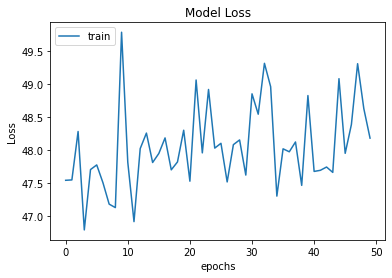

In [41]:
plt.plot(mse_total)
#plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
mse_total

### From Part A - Mean of MSE and Std. Dev.

The mean MSE value is 50.59490996401415 and standard deviation for MSE is 1.0276902495212634

### For Part B - Mean of MSE and Std. Dev.

The mean MSE value is 46.317387506891215 and standard deviation for MSE is 0.17963278002251176

### For Part C - Mean of MSE and Std. Dev.

The mean MSE value is 51.12350691305703 and standard deviation for MSE is 15.7663319140305

In [42]:
#Calculating mean and standard deviation of MSE - Part D
mean = np.mean(mse_total)
std_dev=np.std(mse_total)

print('The mean MSE value is {} and standard deviation for MSE is {}'.format(mean, std_dev))

The mean MSE value is 48.04890876138753 and standard deviation for MSE is 0.6324825358700743
